### DATA 620 Assignment: Project 1
#### Gabriel Santos

### Introduction
#### For this project we were asked to:

- Identify and load a network dataset that has some categorical information available for each node.
- For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
- Compare your centrality measures across your categorical groups.

The data set consists of TV shows and movies available on Netflix as of 2019 from Kaggle https://www.kaggle.com/shivamb/netflix-shows. 
With the data set, we can measure the degree of centrality of nodes, such as TV shows and movies. We can analyze how the data differs between movies and TV shows made in the United States and those made outside the United States.

#### Import libraries

In [1]:
import networkx as nx
import pandas as pd
from numpy.random import seed
from scipy.stats import t, sem
from scipy import stats
from math import sqrt
from numpy import mean
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
%matplotlib inline

#### Load Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/GabrielSantos33/DATA621_Project1/main/netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Filter data

In [4]:
df_domestic = data[data['country']== 'United States']
df_inter = data[data['country'] != 'United States']

In [5]:
df_domestic.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


In [6]:
df_inter.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### Ploting

In [7]:
g_dom = nx.from_pandas_edgelist(df_domestic, 'release_year', 'rating')

In [8]:
print('Edges and Nodes for USA')
print('Number of nodes:', g_dom.order())
print('Number of nodes:', g_dom.size())

Edges and Nodes for USA
Number of nodes: 86
Number of nodes: 319


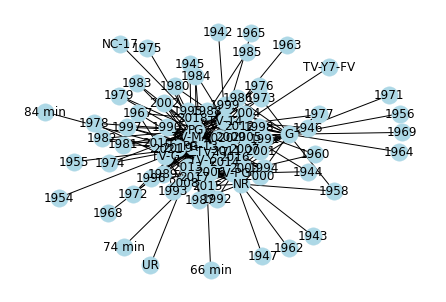

In [9]:
nx.draw(g_dom, node_color='lightblue', with_labels = True)

In [10]:
g_inter = nx.from_pandas_edgelist(df_inter, 'release_year', 'rating')

In [11]:
print('Edges and Nodes for International')
print('Number of nodes:', g_inter.order())
print('Number of nodes:', g_inter.size())

Edges and Nodes for International
Number of nodes: 84
Number of nodes: 352


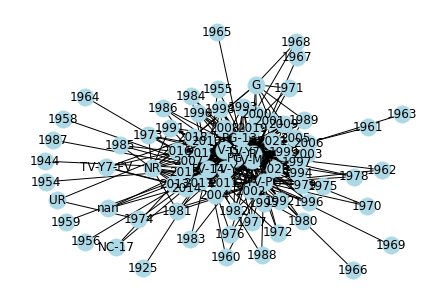

In [12]:
nx.draw(g_inter, node_color='lightblue', with_labels = True)

I compute the centrality measures for both data subsets and compare them.
The R rating has the highest centrality scores in the national dataset, while TV-MA has the highest scores in the international dataset.
- Grade: The grade in the international data set is higher than the national data set. 0.161084 vs. 0.5066173.
- Eigenvector: The R classification value is very close to the TV-MA value, 0.2875 and 0.2813.
- Between: The values for the international data set exceed the national data set. 0.161084 vs. 0.158999.
- Proximity: The values of the international data set also exceed the national data set. or.585714 vs. 0.551020.

USA

In [13]:
eig = nx.eigenvector_centrality(g_dom).values()
cent = nx.degree_centrality(g_dom).values()
between_cent = nx.betweenness_centrality(g_dom).values()
close_cent = nx.closeness_centrality(g_dom).values()

In [14]:
data_tuples = list(zip(eig,cent,between_cent,close_cent))
dom_table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
dom_table.index = list(g_dom)
dom_table.head()

,Eigenvector,Degree,Betweenness,Closeness
2020,0.146380,0.117647,0.015659,0.508982
PG-13,0.275105,0.447059,0.105920,0.521472
2021,0.136319,0.105882,0.008699,0.474860
TV-MA,0.222689,0.352941,0.071366,0.474860
2010,0.133425,0.117647,0.032277,0.480226


INTERNATIONAL

In [15]:
eig = nx.eigenvector_centrality(g_inter).values()
cent = nx.degree_centrality(g_inter).values()
between_cent = nx.betweenness_centrality(g_inter).values()
close_cent = nx.closeness_centrality(g_inter).values()

In [16]:
data_tuples = list(zip(eig,cent,between_cent,close_cent))
inter_table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
inter_table.index = list(g_inter)
inter_table.head()

,Eigenvector,Degree,Betweenness,Closeness
2021,0.128285,0.108434,0.005619,0.509202
TV-MA,0.276788,0.554217,0.151736,0.580420
PG,0.213271,0.361446,0.033551,0.474286
1993,0.093674,0.072289,0.002323,0.479769
TV-14,0.305841,0.722892,0.377219,0.721739


In [17]:
print('Max values for USA')
print(dom_table.idxmax())
print(dom_table.max())

Max values for USA
Eigenvector     R
Degree         PG
Betweenness    PG
Closeness      PG
dtype: object
Eigenvector    0.291396
Degree         0.517647
Betweenness    0.213953
Closeness      0.562914
dtype: float64


In [18]:
print('Max values for International')
print(inter_table.idxmax())
print(inter_table.max())

Max values for International
Eigenvector    TV-14
Degree         TV-14
Betweenness    TV-14
Closeness      TV-14
dtype: object
Eigenvector    0.305841
Degree         0.722892
Betweenness    0.377219
Closeness      0.721739
dtype: float64


Comparing both tables I can see that the R score has the highest value for most of the measures of centrality in the household dataset.  The TV-14 has the highest overall values for all measures of centrality.

#### Statistic analysis
Then lets create a function that accepts USA and international data and performs statistical analysis. This function returns the T-score (t_stat), degrees of freedom (df), critical values (cv), and p-values (p).

In [19]:
def intependent_ttest(dom_table, inter_table, alpha):
    
    mean_dom, mean_inter = mean(dom_table), mean(inter_table)
      
    n1, n2 = len(dom_table), len(inter_table)
    
    d1 = (dom_table.sum() - inter_table.sum()) ** 2
    
    d2 = dom_table.sum() - inter_table.sum()
    
    std_dom, std_inter = dom_table.std(), inter_table.mean()
    
    # calculate standard error
    se_dom, se_inter =dom_table.sem(), inter_table.sem()
    
    sed = np.sqrt(se_dom ** 2 + se_inter ** 2)
    
    # calculate t-score
    t_stat = (mean_dom - mean_inter) / sed
    
    # degrees of freedom
    df = n1 + n2 - 2
    
    # critical value
    alpha = 0.05
    cv = t.ppf(1.0 - alpha, df)
    
    # calculate p values
    p = (1 - t.cdf(abs(t_stat), df)) * 2
    
    return t_stat,df,cv, p

In [20]:
intependent_ttest(dom_table, inter_table, 0.05)

C:\Users\drake\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(Eigenvector   -0.400040
 Degree        -0.729863
 Betweenness    0.391733
 Closeness     -4.586512
 dtype: float64,
 168,
 1.6539742082421154,
 array([6.89635314e-01, 4.66490626e-01, 6.95751819e-01, 8.77409277e-06]))

- T-score: I can see that for most measures of centrality, it is negative, which means that the mean of the international data set is greater than the USA meann. The t-score is positive and closest to zero for betweenness centrality. Closeness centrality is higher, showing that there is a significantly larger difference in this measure between the bot data sets.
- Degrees of Freedom: The degrees of freedom are high - 168, which exceeds the number of nodes in both data sets.
- Critical Values: The value is 1.6539
- P-Palue: is above 0.05 indicates that it could be a NULL hypothesis